In [1]:
import requests
import json
from IPython.display import display
from IPython.display import Image
import numpy as np
import networkx as nx
from py2cytoscape import util as cy 

PORT_NUMBER = 1234
BASE = 'http://localhost:' + str(PORT_NUMBER) + '/v1/'
HEADERS = {'Content-Type': 'application/json'}

In [2]:
res = requests.delete(BASE + 'network')

In [3]:
import csv

with open('Salmonella_enterica_serovar_Agona_SL483_allnetworks.csv', 'r') as f:
  reader = csv.reader(f)
  your_list = list(reader)
    
new_list=your_list[2:]
#print(new_list[0])
#print(len(new_list))

In [4]:
nplist= np.array(new_list)
nplist[nplist[:,5]=='B5EYW8',:]

array([['SeAg_B1491', 'fnr', 'B5F5B3', 'SeAg_B2419', 'glpT', 'B5EYW8',
        'Ecoli', '147', '2152', 'Salmonella_enterica_serovar_Agona_SL483',
        'Transcriptional_regulatory'],
       ['SeAg_B3576', 'fis', 'B5F7P5', 'SeAg_B2419', 'glpT', 'B5EYW8',
        'Ecoli', '1300', '2152', 'Salmonella_enterica_serovar_Agona_SL483',
        'Transcriptional_regulatory'],
       ['SeAg_B3724', 'SeAg_B3724', 'B5F8N9', 'SeAg_B2419', 'glpT',
        'B5EYW8', 'Ecoli', '2287', '2152',
        'Salmonella_enterica_serovar_Agona_SL483',
        'Transcriptional_regulatory'],
       ['SeAg_B3663', 'crp', 'B5F8H8', 'SeAg_B2419', 'glpT', 'B5EYW8',
        'Ecoli', '2484', '2152', 'Salmonella_enterica_serovar_Agona_SL483',
        'Transcriptional_regulatory'],
       ['SeAg_B4193', 'metR', 'B5EZT9', 'SeAg_B2419', 'glpT', 'B5EYW8',
        'Salm', '3412', '2152', 'Salmonella_enterica_serovar_Agona_SL483',
        'Transcriptional_regulatory']], 
      dtype='<U39')

Number of Nodes = 2656
Number of Edges = 7032


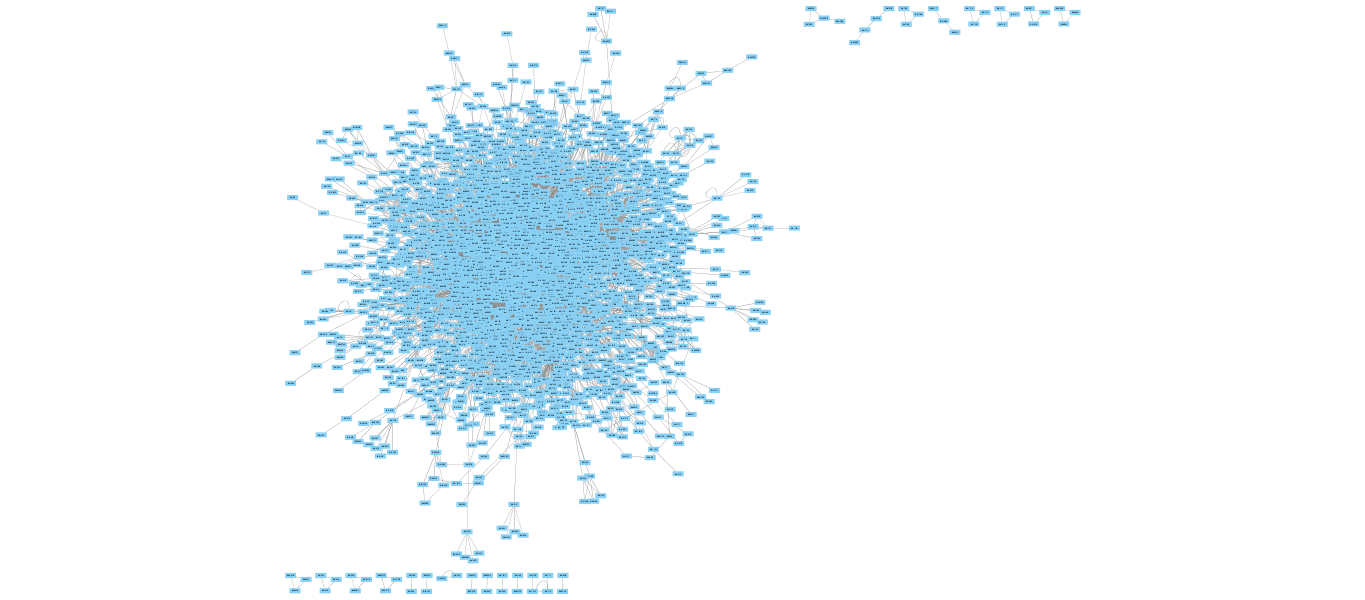

In [5]:
res = requests.delete(BASE + 'session')

g = nx.MultiGraph(name='Salmonella enterica serovar Agona SL483')

for lists in new_list:
    g.add_node(lists[2], node_1_locus_tag=lists[0], node_1_gene_name=lists[1], node_1_ortholog_group=lists[6], node_2_locus_tag=lists[3], node_2_gene_name=lists[4], node_2_ortholog_group=lists[7])
    
    
for lists in new_list:
    g.add_edge(lists[2],lists[5], interaction_type=lists[10], source_data=lists[8], strain=lists[9] )


print('Number of Nodes = ' + str(g.number_of_nodes()))
print('Number of Edges = ' + str(g.number_of_edges()))

cytoscape_network = cy.from_networkx(g)

res1 = requests.post(BASE + 'networks', data=json.dumps(cytoscape_network), headers=HEADERS)
res1_dict = res1.json()
new_suid = res1_dict['networkSUID']
requests.get(BASE + 'apply/layouts/force-directed/' + str(new_suid))
Image(BASE+'networks/' + str(new_suid) + '/views/first.png')

In [6]:
len(set(nplist[:,3])) + len(set(nplist[:,5]))

4722